In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import teams and replace team name
teams = pd.read_csv('teams.csv')
teams = teams.iloc[:, 1:]
teams['team'] = teams['team'].apply(lambda x: x.replace(' ', '-').lower())

# import 2023 box scores
main = pd.read_csv('2023_box_scores.csv')
main = main.iloc[:, 1:]

# merge conference
main = main.merge(teams[['team', 'conf']], on='team', how='left')

# filter to only b10
main = main[main['conf'] == 'B10']
main.head()

,Starters,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,TRB,AST,STL,BLK,TOV,PF,PTS,team,game_id,conf
0,Jacy Sheldon,37,10,19,0.526,8,14,0.571,2,5,...,4,2,5,0,4,2,28,ohio-state,2023-11-06-14-ohio-state,B10
1,Celeste Taylor,35,1,8,0.125,0,3,0.000,1,5,...,3,2,2,0,2,5,7,ohio-state,2023-11-06-14-ohio-state,B10
2,Cotie McMahon,34,3,11,0.273,2,8,0.250,1,3,...,5,2,1,0,5,4,7,ohio-state,2023-11-06-14-ohio-state,B10
3,Taylor Thierry,33,5,6,0.833,5,5,1.000,0,1,...,8,0,2,0,2,3,16,ohio-state,2023-11-06-14-ohio-state,B10
4,Rebeka Mikulasikova,21,2,5,0.400,2,3,0.667,0,2,...,4,1,0,0,1,1,8,ohio-state,2023-11-06-14-ohio-state,B10


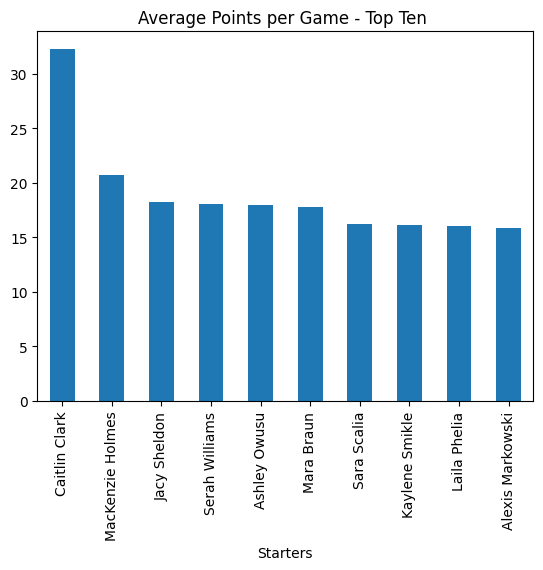

In [3]:
# average points by player
starters = main.groupby('Starters')['PTS'].agg(['mean', 'std'])
starters = starters.sort_values(by=['mean', 'std'], ascending=[False, False])

# chart top ten
top_10 = starters[:10]['mean'].plot(kind='bar')

plt.title('Average Points per Game - Top Ten ')
plt.show()

## Average Points per Minute


In [4]:
# perform aggregates
# minutes played
minutes = main.groupby('Starters')['MP'].agg(['mean', 'std', 'sum', 'count'])
minutes.columns = ['avg_mp', 'mp_std', 'total_min', 'gp']

# points scored
pts = main.groupby('Starters')['PTS'].agg(['mean', 'std', 'sum'])
pts.columns = ['avg_pts', 'pts_std', 'total_points']

# merge tables
stats = minutes.join(pts, how='left')

# points per minute
stats['ppm'] = stats['total_points'] / stats['total_min']

# percent they are included in simulation
stats['sim'] = stats['avg_mp'] / 60

# calculate a rank type field based on time played and ppm then sort
stats['rank'] = stats['sim'] * stats['ppm']
stats = stats.sort_values(by=['rank'], ascending=False)

# top twenty players
stats.head(20)

,avg_mp,mp_std,total_min,gp,avg_pts,pts_std,total_points,ppm,sim,rank
Starters,,,,,,,,,,
Caitlin Clark,34.166667,4.885470,1025,30,32.266667,6.907933,968,0.944390,0.569444,0.537778
MacKenzie Holmes,28.857143,5.595728,808,28,20.678571,5.907018,579,0.716584,0.480952,0.344643
Jacy Sheldon,33.137931,8.171047,961,29,18.241379,7.500739,529,0.550468,0.552299,0.304023
Serah Williams,30.961538,5.141834,805,26,18.076923,6.638814,470,0.583851,0.516026,0.301282
Ashley Owusu,27.285714,3.244607,382,14,18.000000,4.206222,252,0.659686,0.454762,0.300000
Mara Braun,34.150000,7.220402,683,20,17.750000,6.866203,355,0.519766,0.569167,0.295833
Sara Scalia,32.571429,6.414270,912,28,16.250000,7.361688,455,0.498904,0.542857,0.270833
Kaylene Smikle,29.266667,8.606199,439,15,16.133333,8.236388,242,0.551253,0.487778,0.268889
Laila Phelia,34.551724,5.487559,1002,29,16.034483,5.772365,465,0.464072,0.575862,0.267241


In [5]:
# get team
player_team = main[['Starters', 'team']].drop_duplicates()

# merge back to team
stats = stats.merge(player_team, on='Starters', how='left').set_index(['Starters', 'team'])
stats

,,avg_mp,mp_std,total_min,gp,avg_pts,pts_std,total_points,ppm,sim,rank
Starters,team,,,,,,,,,,
Caitlin Clark,iowa,34.166667,4.885470,1025,30,32.266667,6.907933,968,0.944390,0.569444,0.537778
MacKenzie Holmes,indiana,28.857143,5.595728,808,28,20.678571,5.907018,579,0.716584,0.480952,0.344643
Jacy Sheldon,ohio-state,33.137931,8.171047,961,29,18.241379,7.500739,529,0.550468,0.552299,0.304023
Serah Williams,wisconsin,30.961538,5.141834,805,26,18.076923,6.638814,470,0.583851,0.516026,0.301282
Ashley Owusu,penn-state,27.285714,3.244607,382,14,18.000000,4.206222,252,0.659686,0.454762,0.300000
...,...,...,...,...,...,...,...,...,...,...,...
Imbie Jones,wisconsin,2.333333,1.723281,28,12,0.166667,0.577350,2,0.071429,0.038889,0.002778
Lily Krahn,wisconsin,3.500000,1.783765,42,12,0.166667,0.577350,2,0.047619,0.058333,0.002778
Rachel Mutombo,northwestern,1.333333,0.577350,4,3,0.000000,0.000000,0,0.000000,0.022222,0.000000


In [6]:
from scipy.stats import norm

# caitlin clark ppm 
cc = stats.loc[('Caitlin Clark', 'iowa')]

# generate 60 random values of avg pts to get an estimate of points per game 
cc_pts = norm.rvs(cc['avg_pts'], cc['pts_std'], 60)
cc_pts = np.mean(cc_pts)
print(f'Caitlin Clark should score {np.round(cc_pts, 0)} points based on avg pts per game.')


Caitlin Clark should score 32.0 points based on avg pts per game.


In [7]:
indiana = stats.loc[(slice(None), 'indiana'), :]
indiana

,,avg_mp,mp_std,total_min,gp,avg_pts,pts_std,total_points,ppm,sim,rank
Starters,team,,,,,,,,,,
MacKenzie Holmes,indiana,28.857143,5.595728,808,28,20.678571,5.907018,579,0.716584,0.480952,0.344643
Sara Scalia,indiana,32.571429,6.414270,912,28,16.250000,7.361688,455,0.498904,0.542857,0.270833
Yarden Garzon,indiana,28.892857,5.479519,809,28,11.714286,6.462755,328,0.405439,0.481548,0.195238
Sydney Parrish,indiana,26.619048,7.883376,559,21,10.095238,5.512756,212,0.379249,0.443651,0.168254
Chloe Moore-McNeil,indiana,31.321429,6.024970,877,28,10.071429,4.958558,282,0.321551,0.522024,0.167857
Lexus Bargesser,indiana,22.571429,7.141058,632,28,4.321429,4.163809,121,0.191456,0.376190,0.072024
Lilly Meister,indiana,10.285714,4.913000,288,28,3.928571,3.933979,110,0.381944,0.171429,0.065476
Lenée Beaumont,indiana,10.035714,7.057867,281,28,3.142857,3.768429,88,0.313167,0.167262,0.052381
Julianna LaMendola,indiana,9.730769,5.956896,253,26,1.923077,2.770171,50,0.197628,0.162179,0.032051


In [9]:
# average minutes played
indiana.index

MultiIndex([(      'MacKenzie Holmes', 'indiana'),
            (           'Sara Scalia', 'indiana'),
            (         'Yarden Garzon', 'indiana'),
            (        'Sydney Parrish', 'indiana'),
            (    'Chloe Moore-McNeil', 'indiana'),
            (       'Lexus Bargesser', 'indiana'),
            (         'Lilly Meister', 'indiana'),
            (        'Lenée Beaumont', 'indiana'),
            (    'Julianna LaMendola', 'indiana'),
            (         'Henna Sandvik', 'indiana'),
            ('Sharnecce Currie-Jelks', 'indiana'),
            (         'Arielle Wisne', 'indiana')],
           names=['Starters', 'team'])